Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1462 non-null   object 
 1   openBTC            1462 non-null   float64
 2   highBTC            1462 non-null   float64
 3   lowBTC             1462 non-null   float64
 4   closeBTC           1462 non-null   float64
 5   volumeBTC          1462 non-null   float64
 6   marketCapBTC       1462 non-null   float64
 7   openETH            1462 non-null   float64
 8   highETH            1462 non-null   float64
 9   lowETH             1462 non-null   float64
 10  closeETH           1462 non-null   float64
 11  volumeETH          1462 non-null   int64  
 12  marketCapETH       1462 non-null   float64
 13  openXMR            1462 non-null   float64
 14  highXMR            1462 non-null   float64
 15  lowXMR             1462 non-null   float64
 16  closeX

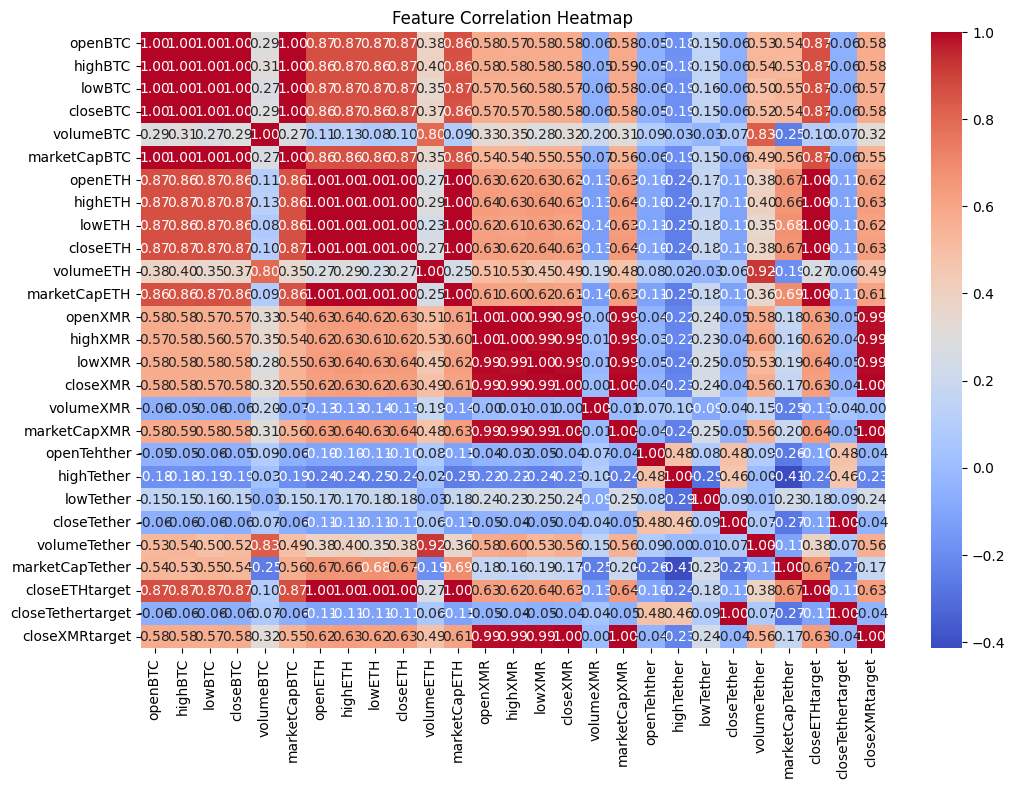

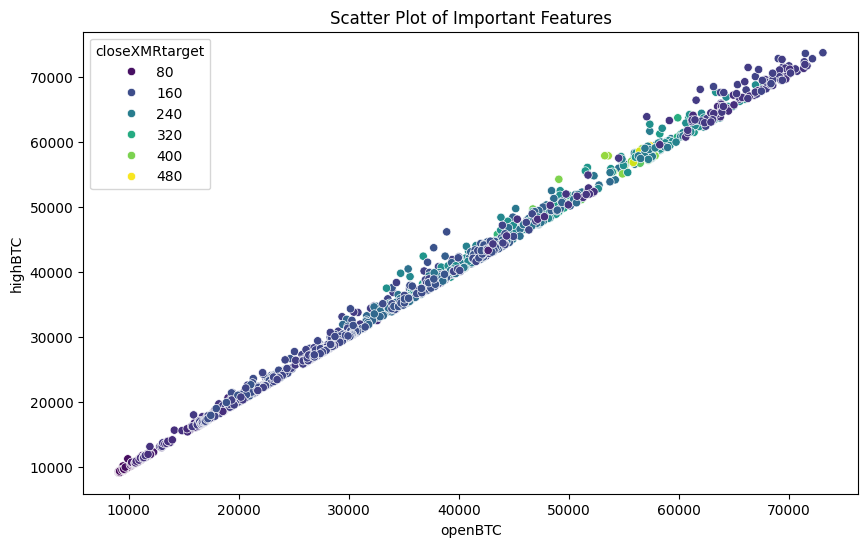

Mean Absolute Error: 0.3689152134474383
Mean Squared Error: 1.3379455738680543
R-squared Score: 0.9996407849744984


<ipython-input-2-7b033452b7fc>:82: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




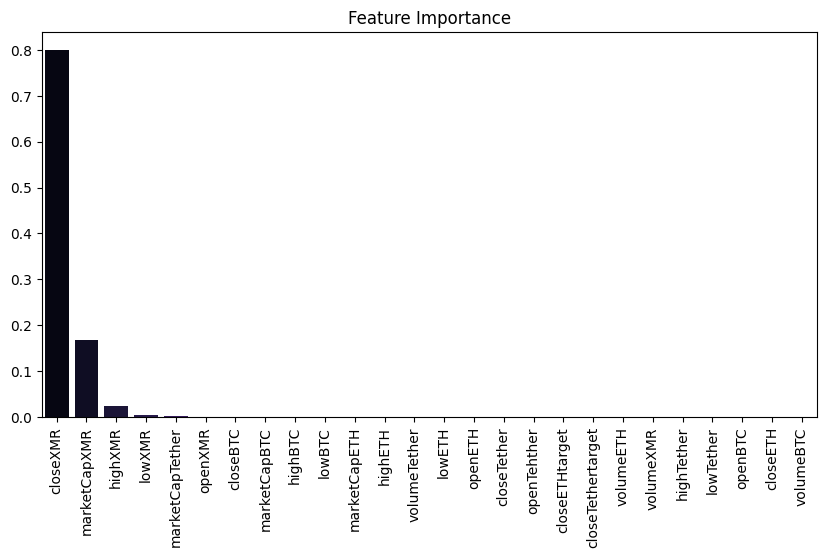

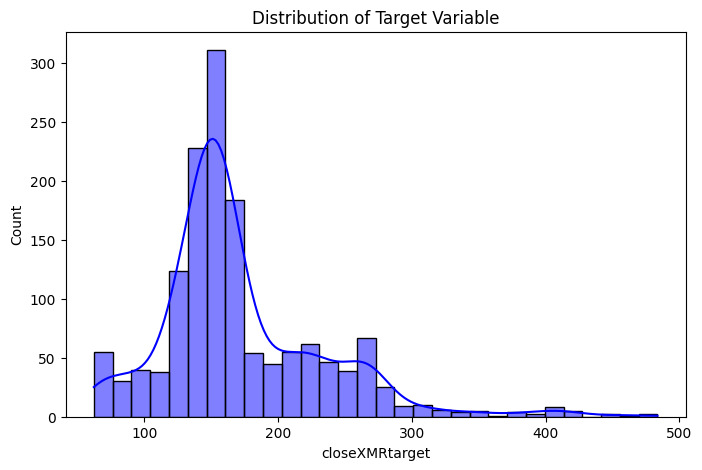

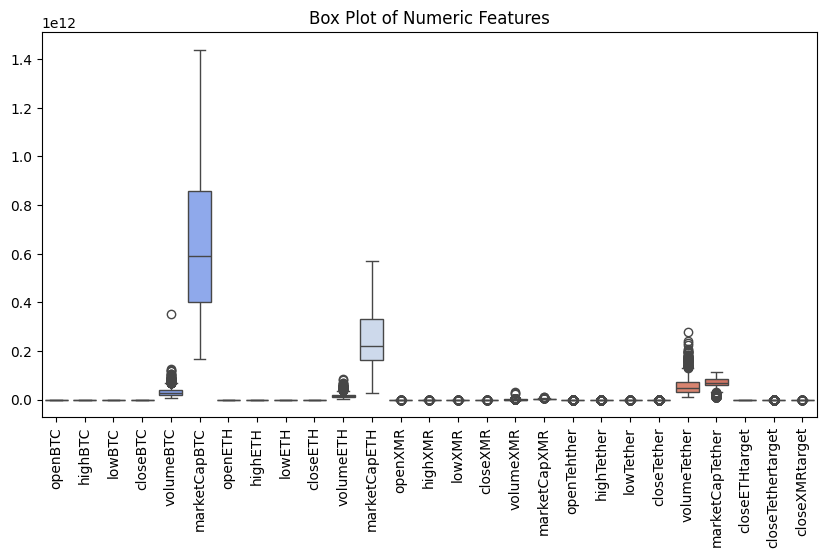

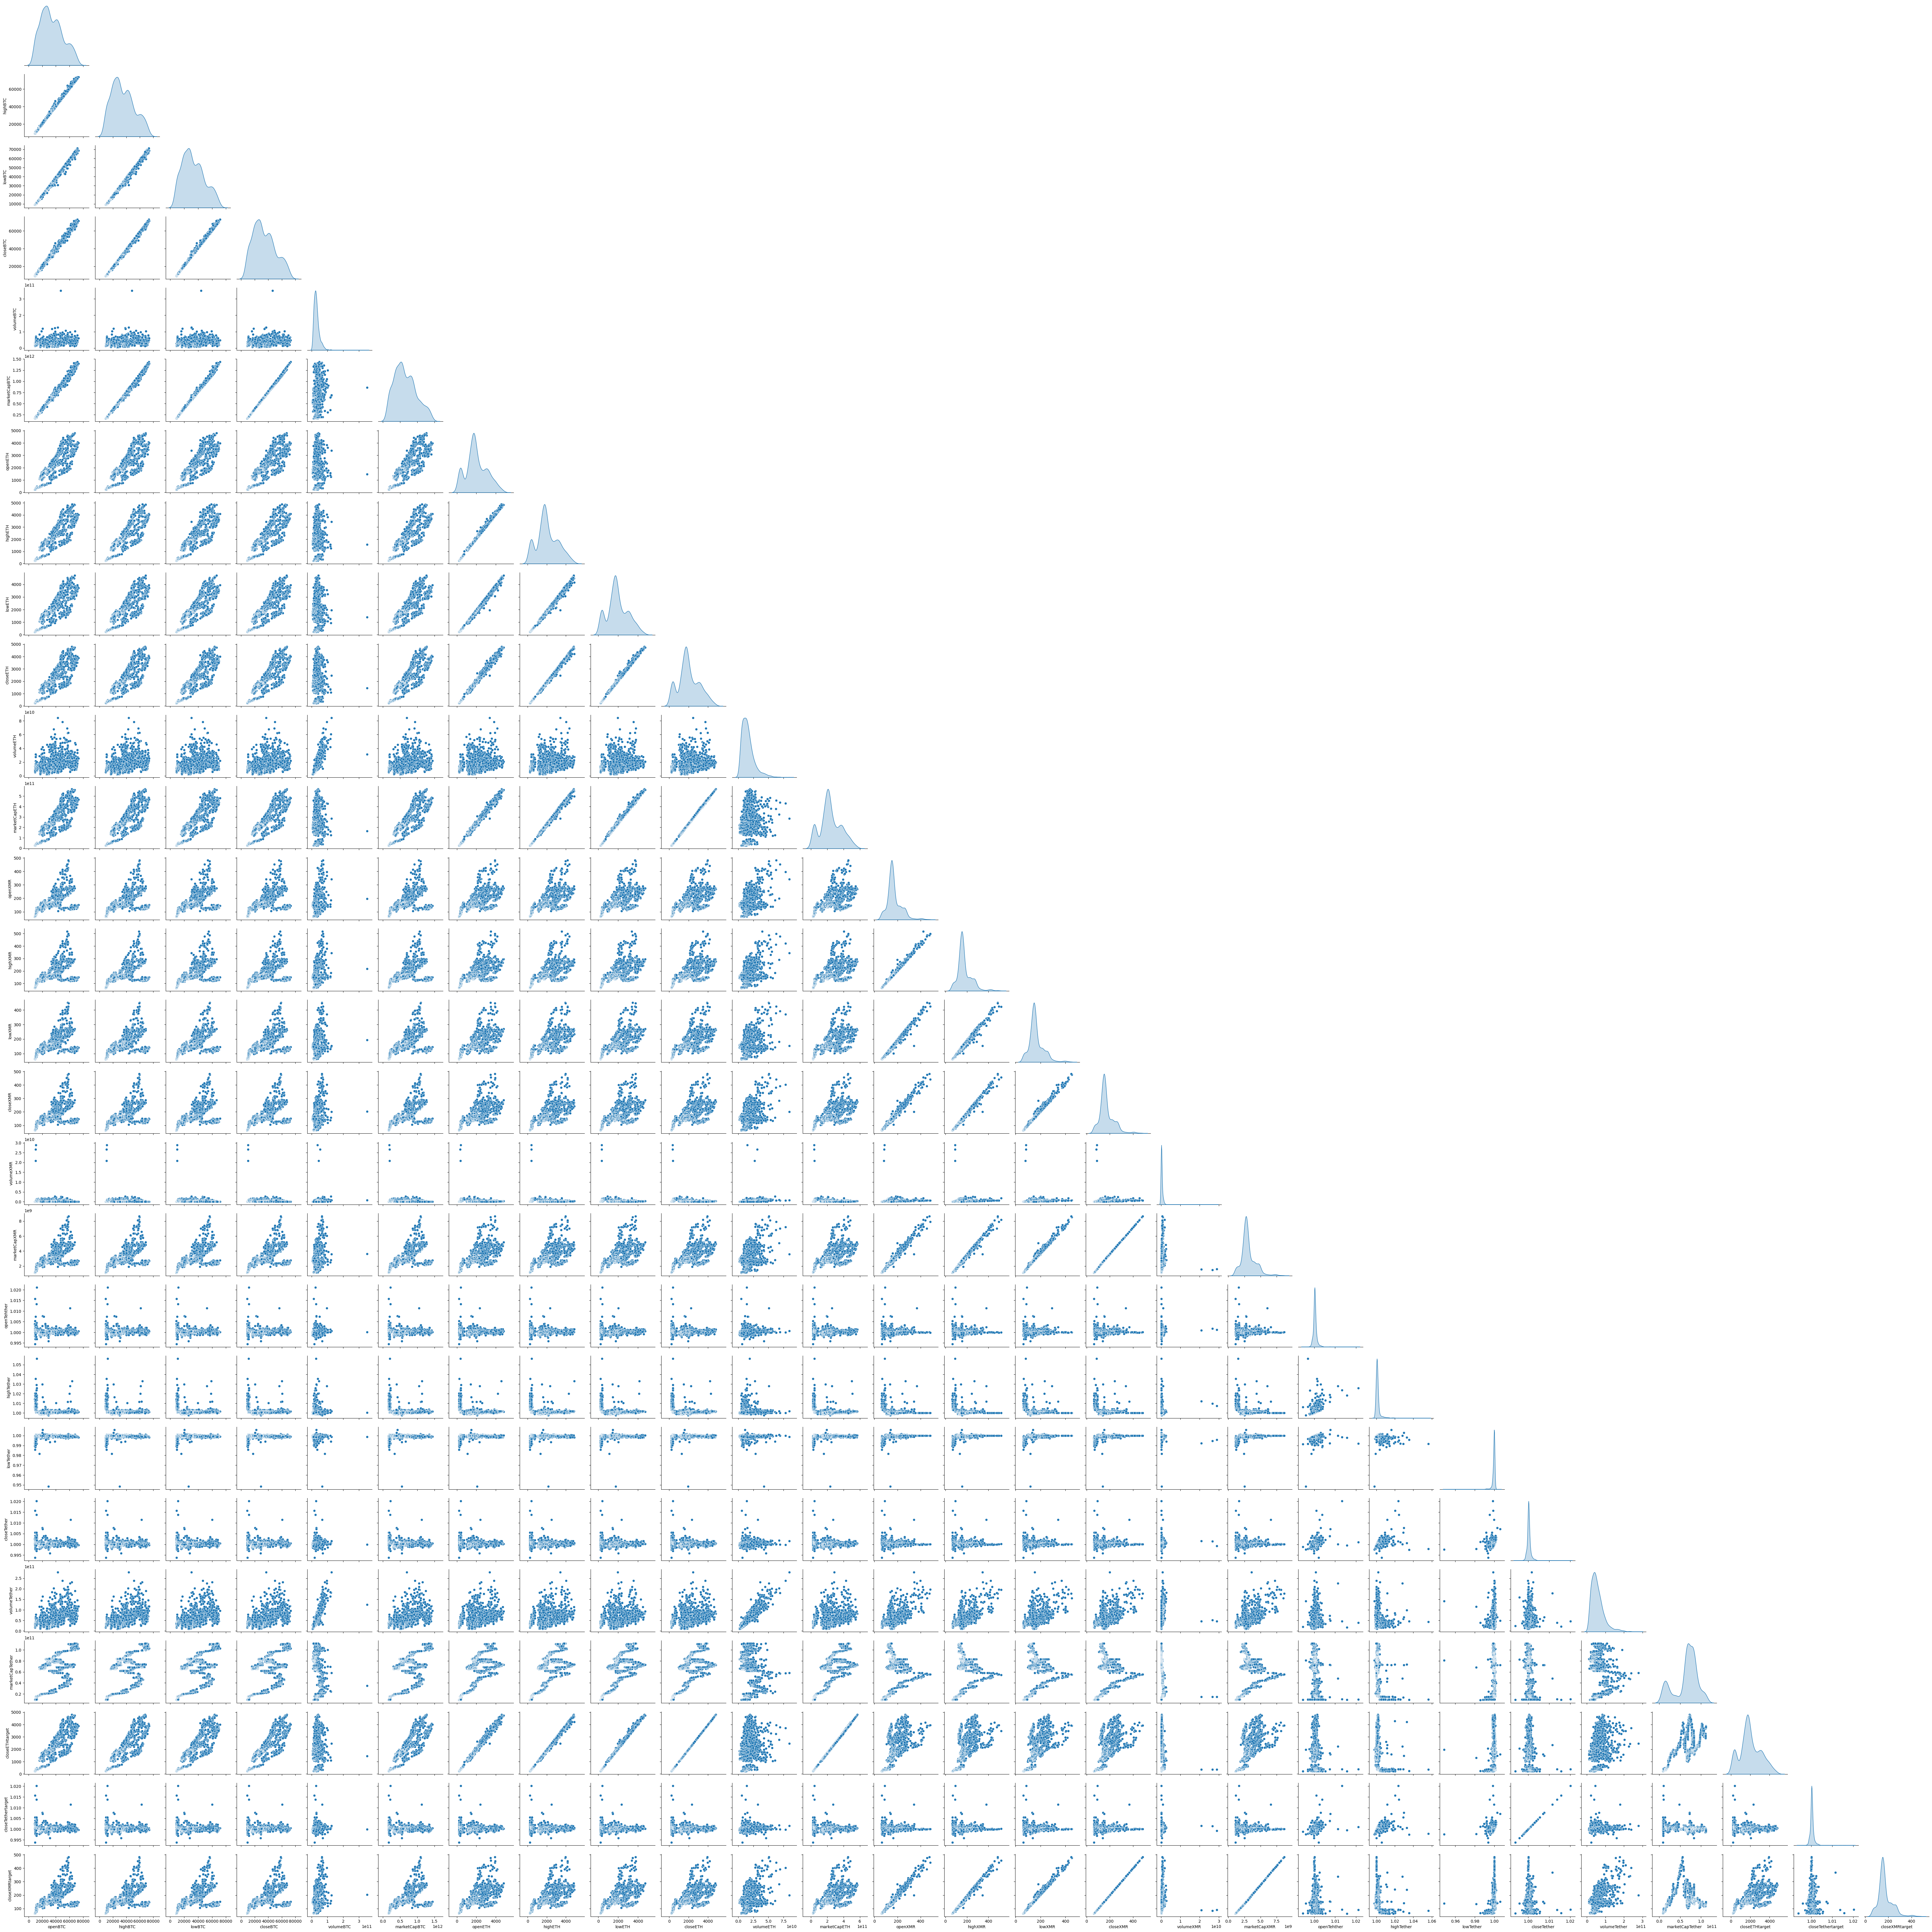

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('cryptodataset.csv')

# Display basic information
print("Dataset Overview:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Convert date columns if present
date_columns = ['Date']  # Update this list based on actual date column names
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col])

# Select only numeric columns for filling missing values
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Convert categorical variables if present
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    if col not in date_columns:
        data[col] = le.fit_transform(data[col])

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# Scatter Plot for two important features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[numeric_cols[0]], y=data[numeric_cols[1]], hue=data[numeric_cols[-1]], palette='viridis')
plt.title('Scatter Plot of Important Features')
plt.show()

# Interactive Line Chart using Plotly
fig = px.line(data, x=date_columns[0], y=numeric_cols[0], title='Trend Over Time')
fig.show()

# Define features and target
target_col = numeric_cols[-1]  # Selecting the last numeric column as target (update manually if needed)
y = data[target_col]
X = data.drop(columns=[target_col] + date_columns)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
sns.barplot(x=[feature_names[i] for i in sorted_indices], y=importances[sorted_indices], palette='magma')
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

# Interactive Bar Chart for Feature Importance
fig = px.bar(x=[feature_names[i] for i in sorted_indices], y=importances[sorted_indices], title='Feature Importance', labels={'x': 'Features', 'y': 'Importance'}, color=importances[sorted_indices], color_continuous_scale='bluered')
fig.show()

# Histogram of the Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title('Distribution of Target Variable')
plt.show()

# Box Plot for Outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data[numeric_cols], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Box Plot of Numeric Features')
plt.show()

# Pair Plot for Numeric Features
sns.pairplot(data[numeric_cols], diag_kind='kde', corner=True)
plt.show()
